# HW-05

#### Author: Sanjay Bhargav Siddi

This document shows a comprehensive regression analysis on a the Life Expectancy dataset from the 2023 #tidytuesday repository. The process includes data exploration, preprocessing, Ordinary Least Squares (OLS) regression with assumption checks, and the implementation and evaluation of alternative regression methods such as Ridge and Lasso.


## 1. Data selection and exploration

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Getting the dataset from #tidytuesday


In [6]:
life_expectancy = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-12-05/life_expectancy.csv')
life_expectancy_different_ages = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-12-05/life_expectancy_different_ages.csv')
life_expectancy_female_male = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-12-05/life_expectancy_female_male.csv')

In [13]:
merged_data = pd.merge(life_expectancy, life_expectancy_different_ages, on=['Entity', 'Code', 'Year'])
data = pd.merge(merged_data, life_expectancy_female_male, on=['Entity', 'Code', 'Year'])

In [16]:
data

,Entity,Code,Year,LifeExpectancy,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80,LifeExpectancyDiffFM
0,Afghanistan,AFG,1950,27.7275,27.7275,49.1459,54.442200,63.422500,73.4901,83.7259,1.261900
1,Afghanistan,AFG,1951,27.9634,27.9634,49.2941,54.564400,63.500603,73.5289,83.7448,1.270601
2,Afghanistan,AFG,1952,28.4456,28.4456,49.5822,54.799800,63.647600,73.6018,83.7796,1.288300
3,Afghanistan,AFG,1953,28.9304,28.9304,49.8634,55.028603,63.788902,73.6706,83.8118,1.306601
4,Afghanistan,AFG,1954,29.2258,29.2258,49.9306,55.116500,63.848100,73.7041,83.8334,1.276501
...,...,...,...,...,...,...,...,...,...,...,...
19485,Zimbabwe,ZWE,2017,60.7095,60.7095,64.6277,66.110596,71.014100,78.5895,86.8135,4.748299
19486,Zimbabwe,ZWE,2018,61.4141,61.4141,65.1821,66.604500,71.267200,78.6681,86.8399,4.625503
19487,Zimbabwe,ZWE,2019,61.2925,61.2925,65.0582,66.491600,71.203400,78.6739,86.8614,5.017799
19488,Zimbabwe,ZWE,2020,61.1242,61.1242,64.8006,66.086900,70.519104,78.0986,86.5717,5.732201


#### Dataset Description:

|     Variable           |   Class  |             Description                           |
|:-----------------------:|:--------:|:-------------------------------------------------:|
|         Entity          | character|     Country or region entity                       |
|          Code           | character|              Entity code                           |
|          Year           |  double  |                    Year                             |
|    LifeExpectancy0      |  double  | Period life expectancy at birth - Sex: all - Age: 0|
|    LifeExpectancy10     |  double  |    Period life expectancy - Sex: all - Age: 10    |
|    LifeExpectancy25     |  double  |    Period life expectancy - Sex: all - Age: 25    |
|    LifeExpectancy45     |  double  |    Period life expectancy - Sex: all - Age: 45    |
|    LifeExpectancy65     |  double  |    Period life expectancy - Sex: all - Age: 65    |
|    LifeExpectancy80     |  double  |    Period life expectancy - Sex: all - Age: 80    |
| LifeExpectancyDiffFM    |  double  | Life expectancy difference (f-m) - Type: period - Sex: both - Age: 0|


In [22]:
# Describe missing values
missing_values = data.isnull().sum()
missing_values

Entity                     0
Code                    1168
Year                       0
LifeExpectancy             0
LifeExpectancy0            0
LifeExpectancy10           0
LifeExpectancy25           0
LifeExpectancy45           0
LifeExpectancy65           0
LifeExpectancy80           0
LifeExpectancyDiffFM       0
dtype: int64

There are 1168 rows which have null values in the Code column. 

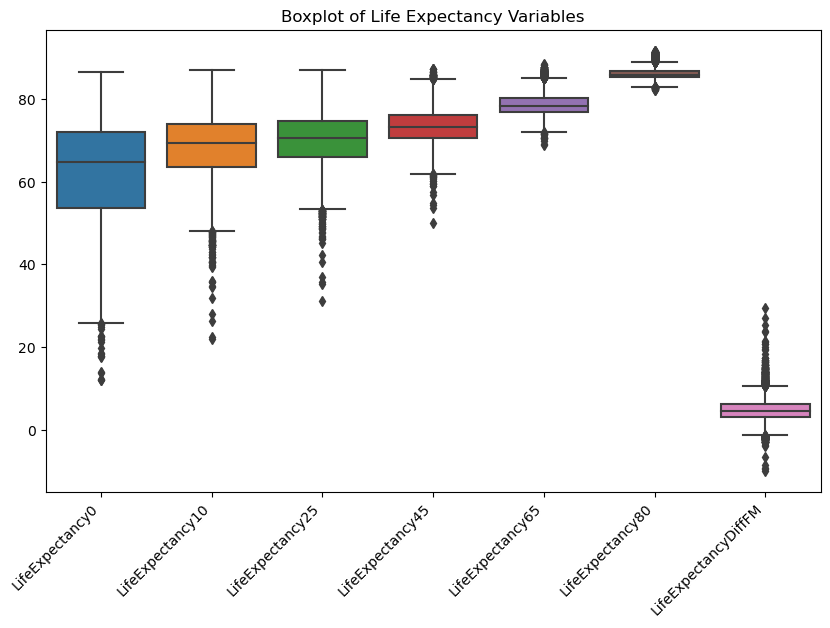

In [28]:
# Plot outliers
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data[['LifeExpectancy0', 'LifeExpectancy10', 'LifeExpectancy25', 'LifeExpectancy45', 'LifeExpectancy65', 'LifeExpectancy80', 'LifeExpectancyDiffFM']])
plt.title('Boxplot of Life Expectancy Variables')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

From this box plot we can easily identify the outliers. We can observe the prensence of extreme values in the dataset by looking at the data points below the whiskers. 

Example 1: In LifeExpectancy0 and LifeExpectancy1, the median line is not in the center suggesting that the data is not symmetrically distributed. The tall box size of LifeExpectancy0 indicates the narrow spread of data in it. 

Example 2: In LifeExpectancy45, the outliers are present at either ends of the whiskers. And the wide nature of the box suggests a wider spread.

In [29]:
data_shape = data.shape
data_shape

(19490, 11)

In [38]:
correlation_matrix = merged_data.corr()
correlation_matrix

,Year,LifeExpectancy,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Year,1.000000,0.597792,0.597792,0.537543,0.523513,0.521685,0.528763,0.495097
LifeExpectancy,0.597792,1.000000,1.000000,0.968572,0.953081,0.917104,0.876127,0.796174
LifeExpectancy0,0.597792,1.000000,1.000000,0.968572,0.953081,0.917104,0.876127,0.796174
LifeExpectancy10,0.537543,0.968572,0.968572,1.000000,0.996099,0.968553,0.919194,0.828120
LifeExpectancy25,0.523513,0.953081,0.953081,0.996099,1.000000,0.983986,0.937024,0.844521
LifeExpectancy45,0.521685,0.917104,0.917104,0.968553,0.983986,1.000000,0.977651,0.898823
LifeExpectancy65,0.528763,0.876127,0.876127,0.919194,0.937024,0.977651,1.000000,0.961757
LifeExpectancy80,0.495097,0.796174,0.796174,0.828120,0.844521,0.898823,0.961757,1.000000


The correlation between the "Year" variable and "Life Expectancy" is 0.60, indicating a moderate positive correlation.

All variables related to life expectancy show strong positive correlations with each other, ranging from 0.80 to 1.00

There is a decreasing trend in the correlation as the age groups get farther apart. For example, "LifeExpectancy" and "LifeExpectancy80" have a lower correlation (0.50), indicating a weaker positive relationship compared to the correlations within closer age groups